Nama    : Zuyyina Hawani


Nim     : 09040620070


Kelas   : Data Mining A

<a id="1"></a> <br>
# 📥 Importing Libraries

import library yang digunakan untuk menjalankan program

In [1]:
import numpy as np
import cv2
import os
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

<a id="2"></a> <br> 
# 🗃️ Load Dataset

Mendefinisikan path folder

In [2]:
# Mendefinisikan path ke folder dataset citra
dataset_folder = 'C:/Data Mining/skrips/trpo test/coba'

# Mendefinisikan daftar kelas atau label
labels = ['norm', 'trypo']

Inisialisasi data

In [3]:
# Inisialisasi untuk menyimpan data fitur dan target
data_fitur = []
data_target = []

# Resizing gambar yang diinginkan 
width = 255
height = 255

In [4]:
# Load gambar untuk menentukan data training dan target
for label in labels:
    label_folder = os.path.join(dataset_folder, label)
    for image_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_file)
        image = cv2.imread(image_path)
        
        # Resize gambar untuk menentukan ukuran
        image = cv2.resize(image, (width, height))
        data_fitur.append(image)
        data_target.append(label)

# convert ke dalam numpy array
X_train = np.array(data_fitur)
y_train = np.array(data_target)

# Reshape the training data to (num_samples, num_features)
X_train = X_train.reshape(X_train.shape[0], -1)

Total data train yang digunakan

In [5]:
print(X_train.shape)
print(y_train.shape)


(400, 195075)
(400,)


In [6]:
# Memasukan dataset fitur kedalam data frame
df = pd.DataFrame(X_train).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,...,195065,195066,195067,195068,195069,195070,195071,195072,195073,195074
0,255,250,251,255,250,251,255,250,251,255,...,248,252,247,248,252,247,248,252,247,248
1,250,255,252,248,255,252,253,253,254,255,...,70,52,51,60,42,41,50,52,56,63
2,83,116,135,85,112,133,94,123,138,126,...,253,254,255,253,254,255,253,254,255,253
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,255,210,253,255,210,252,255,211,251,253,...,250,255,211,252,255,211,252,253,211,252
396,249,247,239,248,246,238,249,247,239,248,...,119,92,109,118,106,118,122,112,123,120
397,103,177,216,103,177,216,99,172,212,102,...,58,0,21,63,0,26,73,4,38,90
398,225,241,248,225,241,248,225,241,248,225,...,248,226,244,248,226,244,248,226,244,248


In [7]:
# Tambahkan label menggunakan data target
df['Label'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,195066,195067,195068,195069,195070,195071,195072,195073,195074,Label
0,255,250,251,255,250,251,255,250,251,255,...,252,247,248,252,247,248,252,247,248,norm
1,250,255,252,248,255,252,253,253,254,255,...,52,51,60,42,41,50,52,56,63,norm
2,83,116,135,85,112,133,94,123,138,126,...,254,255,253,254,255,253,254,255,253,norm
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,norm
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,255,210,253,255,210,252,255,211,251,253,...,255,211,252,255,211,252,253,211,252,trypo
396,249,247,239,248,246,238,249,247,239,248,...,92,109,118,106,118,122,112,123,120,trypo
397,103,177,216,103,177,216,99,172,212,102,...,0,21,63,0,26,73,4,38,90,trypo
398,225,241,248,225,241,248,225,241,248,225,...,226,244,248,226,244,248,226,244,248,trypo


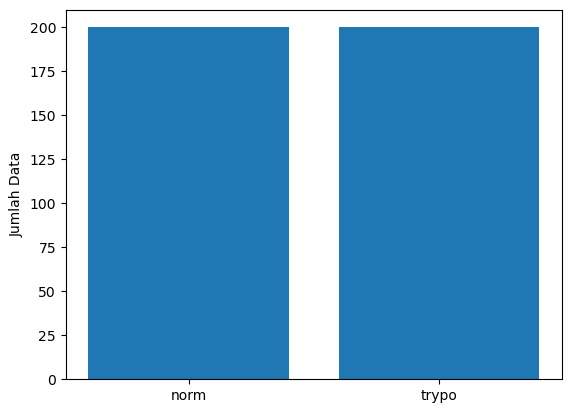

In [8]:
# Menghitung jumlah data untuk setiap nilai target
jumlah_data_target = df['Label'].value_counts()

# Membuat plot bar chart
plt.bar(jumlah_data_target.index, jumlah_data_target.values)

# Memberi label pada sumbu x dan y
plt.xlabel('')
plt.xlabel('')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

<a id="6"></a> <br>
# 📚 Menggunakan Model PCA

Menggunakan PCA untuk reduksi dimensi

In [9]:
# Jumlah fitur yang diinginkan
n_components = 5
pca = PCA(n_components=n_components)
df1 = pca.fit_transform(X_train)

# Cetak hasil PCA
print(df1)

[[-36795.71835041 -11668.19305821   -228.66177605   1101.47308617
   -2340.94934745]
 [ -4365.81830789  -2772.2469364   -9235.51282013  -4990.66518144
   -2748.09603508]
 [ -3916.54983187 -26144.17038051  -2304.45443352  14014.44759247
    3618.62154078]
 ...
 [ -2284.66178043    133.12203494   2869.04119972   -948.36331734
  -14758.57076871]
 [-32963.69573577  -4577.59612696   9181.69843385  -3735.02049627
    -374.12975992]
 [ 12367.4590798   -5262.13149247   4652.33375265    175.91246361
  -10428.06079939]]


In [10]:
# Memasukan dataset fitur kedalam data frame
dataset = pd.DataFrame(df1).astype(int)
# Tambahkan label menggunakan data target
dataset['Label'] = y_train
dataset

,0,1,2,3,4,Label
0,-36795,-11668,-228,1101,-2340,norm
1,-4365,-2772,-9235,-4990,-2748,norm
2,-3916,-26144,-2304,14014,3618,norm
3,-48961,3286,-775,623,1937,norm
4,21335,17115,-7770,6435,-7976,norm
...,...,...,...,...,...,...
395,-14136,3603,-931,-1713,-2046,trypo
396,15796,-1908,10271,3505,-4470,trypo
397,-2284,133,2869,-948,-14758,trypo
398,-32963,-4577,9181,-3735,-374,trypo


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       400 non-null    int32 
 1   1       400 non-null    int32 
 2   2       400 non-null    int32 
 3   3       400 non-null    int32 
 4   4       400 non-null    int32 
 5   Label   400 non-null    object
dtypes: int32(5), object(1)
memory usage: 11.1+ KB


In [12]:
l_label = LabelEncoder()
dataset['Label'] = l_label.fit_transform(dataset['Label'])
dataset.head()

,0,1,2,3,4,Label
0,-36795,-11668,-228,1101,-2340,0
1,-4365,-2772,-9235,-4990,-2748,0
2,-3916,-26144,-2304,14014,3618,0
3,-48961,3286,-775,623,1937,0
4,21335,17115,-7770,6435,-7976,0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       400 non-null    int32
 1   1       400 non-null    int32
 2   2       400 non-null    int32
 3   3       400 non-null    int32
 4   4       400 non-null    int32
 5   Label   400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [14]:
X = dataset.drop('Label', axis=1)
y = dataset['Label']

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = int(time.time()))

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(280, 5)
(120, 5)
(280,)
(120,)


In [16]:
# Normalisasi fitur 
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [17]:
# Create and train the neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
clf.fit(Xtrain, ytrain)

# Predict on the test set
y_pred = clf.predict(Xtrain)

# Evaluate the classifier
accuracy = accuracy_score(ytrain, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [18]:
# Predict on the test set
y_pred2 = clf.predict(Xtest)

print("Akurasi pada data test:")
print(classification_report(ytest, y_pred2))

Akurasi pada data test:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        62
           1       0.63      0.66      0.64        58

    accuracy                           0.65       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.65      0.65      0.65       120



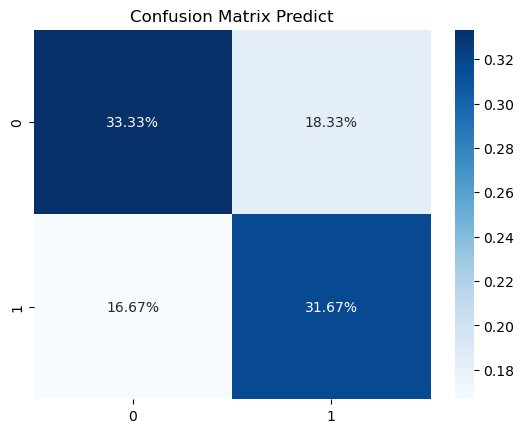

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred2)
sns.heatmap((cm/np.sum(cm)), annot= True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix Predict")
plt.show()